In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import datetime
import ipywidgets as widgets
from IPython.display import display, Javascript

##### Data source: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

##### Data Dictionary: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

##### Github: https://github.com/pegasus-99/NYC_yellowcab_data_visualization

In [ ]:
parquet_file = 'https://github.com/pegasus-99/NYC_yellowcab_data_visualization/blob/main/yellow_tripdata.parquet?raw=true'

In [ ]:
df = pd.read_parquet(parquet_file, engine='auto')

In [ ]:
df.to_csv('yellow_tripdata.csv')

In [ ]:
taxi_data_dict = "https://raw.githubusercontent.com/pegasus-99/NYC_yellowcab_data_visualization/main/taxi%2B_zone_lookup.csv"

In [ ]:
# This is the data dictionary file with corresponding zone names for their ID

taxi_lookup = pd.read_csv(taxi_data_dict, index_col=0)

In [ ]:
taxi_lookup.head()

,Borough,Zone,service_zone
LocationID,,,
1,EWR,Newark Airport,EWR
2,Queens,Jamaica Bay,Boro Zone
3,Bronx,Allerton/Pelham Gardens,Boro Zone
4,Manhattan,Alphabet City,Yellow Zone
5,Staten Island,Arden Heights,Boro Zone


In [ ]:
taxi_lookup = taxi_lookup.reset_index()

In [ ]:
# Renaming them so that it can be maerged with the main dataframe on its PULocationID

taxi_lookup = taxi_lookup.rename(columns={"LocationID":"PULocationID", "Zone":"Pickup Zone"})

In [ ]:
taxi_lookup

,PULocationID,Borough,Pickup Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [ ]:
# Merging with data dictionary to get pickup zones

df = pd.merge(df, taxi_lookup, on="PULocationID", how="left")

In [ ]:
# Dropping unnecessary columns

df.drop(['Borough', 'service_zone'], axis=1, inplace=True)

We repeat the above process to get Dropoff Zones

In [ ]:
taxi_lookup = taxi_lookup.rename(columns={"PULocationID":"DOLocationID", "Pickup Zone":"Dropoff Zone"})

In [ ]:
taxi_lookup

,DOLocationID,Borough,Dropoff Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [ ]:
df = pd.merge(df, taxi_lookup, on="DOLocationID", how="left")

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pickup Zone,Borough,Dropoff Zone,service_zone
0,1,2022-08-01 00:17:39,2022-08-01 00:19:58,1.0,0.4,1.0,N,114,148,1,...,1.80,0.00,0.3,9.10,2.5,0.0,Greenwich Village South,Manhattan,Lower East Side,Yellow Zone
1,1,2022-08-01 00:26:06,2022-08-01 00:31:55,1.0,1.4,1.0,N,79,137,1,...,2.05,0.00,0.3,12.35,2.5,0.0,East Village,Manhattan,Kips Bay,Yellow Zone
2,1,2022-08-01 00:45:49,2022-08-01 00:59:29,1.0,5.2,1.0,N,79,74,1,...,3.95,0.00,0.3,23.75,2.5,0.0,East Village,Manhattan,East Harlem North,Boro Zone
3,1,2022-08-01 00:05:49,2022-08-01 00:25:42,1.0,9.4,1.0,N,138,113,1,...,7.65,6.55,0.3,46.00,2.5,0.0,LaGuardia Airport,Manhattan,Greenwich Village North,Yellow Zone
4,1,2022-08-01 00:36:29,2022-08-01 00:51:29,1.0,1.7,1.0,N,137,68,1,...,1.00,0.00,0.3,15.80,2.5,0.0,Kips Bay,Manhattan,East Chelsea,Yellow Zone


In [ ]:
df.drop(['Borough', 'service_zone'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Pickup Zone',
       'Dropoff Zone'],
      dtype='object')

In [ ]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          93174
trip_distance                0
RatecodeID               93174
store_and_fwd_flag       93174
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     93174
airport_fee              93174
Pickup Zone               6214
Dropoff Zone             14108
dtype: int64

In [ ]:
# Dropping data where fare amount is less than 0 and trip distance is 0

drops = df[(df["fare_amount"] <= 0) | (df["trip_distance"] == 0) ]
df2 = df[ ~df.index.isin(drops.index) ].copy()
df2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pickup Zone,Dropoff Zone
0,1,2022-08-01 00:17:39,2022-08-01 00:19:58,1.0,0.40,1.0,N,114,148,1,...,3.0,0.5,1.80,0.00,0.3,9.10,2.5,0.0,Greenwich Village South,Lower East Side
1,1,2022-08-01 00:26:06,2022-08-01 00:31:55,1.0,1.40,1.0,N,79,137,1,...,3.0,0.5,2.05,0.00,0.3,12.35,2.5,0.0,East Village,Kips Bay
2,1,2022-08-01 00:45:49,2022-08-01 00:59:29,1.0,5.20,1.0,N,79,74,1,...,3.0,0.5,3.95,0.00,0.3,23.75,2.5,0.0,East Village,East Harlem North
3,1,2022-08-01 00:05:49,2022-08-01 00:25:42,1.0,9.40,1.0,N,138,113,1,...,3.0,0.5,7.65,6.55,0.3,46.00,2.5,0.0,LaGuardia Airport,Greenwich Village North
4,1,2022-08-01 00:36:29,2022-08-01 00:51:29,1.0,1.70,1.0,N,137,68,1,...,3.0,0.5,1.00,0.00,0.3,15.80,2.5,0.0,Kips Bay,East Chelsea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152671,1,2022-08-31 23:46:16,2022-08-31 23:50:42,NaN,0.90,NaN,None,234,48,0,...,0.5,0.5,1.40,0.00,0.3,10.70,NaN,NaN,Union Sq,Clinton East
3152672,2,2022-08-31 23:40:00,2022-08-31 23:49:00,NaN,1.52,NaN,None,234,158,0,...,0.0,0.5,0.00,0.00,0.3,13.60,NaN,NaN,Union Sq,Meatpacking/West Village West
3152673,1,2022-08-31 23:11:41,2022-08-31 23:21:23,NaN,2.10,NaN,None,48,238,0,...,0.5,0.5,1.77,0.00,0.3,13.57,NaN,NaN,Clinton East,Upper West Side North
3152674,2,2022-08-31 23:02:53,2022-08-31 23:12:13,NaN,1.00,NaN,None,230,48,0,...,0.0,0.5,3.18,0.00,0.3,16.73,NaN,NaN,Times Sq/Theatre District,Clinton East


In [ ]:
# Converting pickup and dropoff columns from object to datetime

df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])
df2['tpep_dropoff_datetime'] = pd.to_datetime(df2['tpep_dropoff_datetime'])

In [ ]:
# Creating columns for pickup date and pickup time from the datetime format, same for dropoff 

df2['pickup_date'] =  [d.date() for d in df2['tpep_pickup_datetime']]
df2['pickup_time'] =  [d.time() for d in df2['tpep_pickup_datetime']]
df2['dropoff_date'] = [d.date() for d in df2['tpep_dropoff_datetime']]
df2['dropoff_time'] = [d.time() for d in df2['tpep_dropoff_datetime']]

In [ ]:
# Converting pickup date and dropoff date into datetime format

df2['pickup_date'] = pd.to_datetime(df2['pickup_date'])
df2['dropoff_date'] = pd.to_datetime(df2['dropoff_date'])

In [ ]:
df2.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
Pickup Zone                      object
Dropoff Zone                     object
pickup_date              datetime64[ns]
pickup_time                      object
dropoff_date             datetime64[ns]
dropoff_time                     object


In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Pickup Zone',
       'Dropoff Zone'],
      dtype='object')

In [ ]:
# Pickup zones

df['Pickup Zone'].head()

0    Greenwich Village South
1               East Village
2               East Village
3          LaGuardia Airport
4                   Kips Bay
Name: Pickup Zone, dtype: object

Text(0, 0.5, 'Tip count')

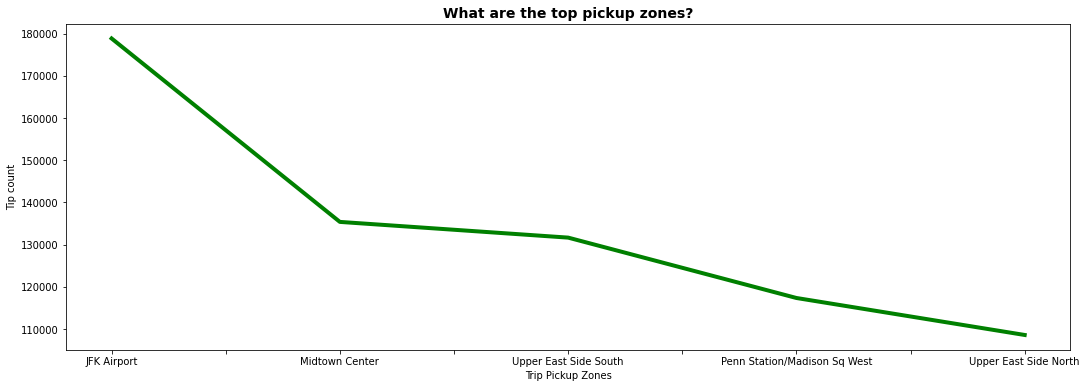

In [ ]:
# Top pickup zones

plt.figure(figsize=(18,6))

df['Pickup Zone'].value_counts().head().plot(color='green', linewidth=4)
plt.title("What are the top pickup zones?", fontweight="bold", fontsize=14)
plt.xlabel('Trip Pickup Zones')
plt.ylabel('Tip count')

In [ ]:
# Drop off zones?

df['Dropoff Zone'].head()

0            Lower East Side
1                   Kips Bay
2          East Harlem North
3    Greenwich Village North
4               East Chelsea
Name: Dropoff Zone, dtype: object

Text(0, 0.5, 'Tip count')

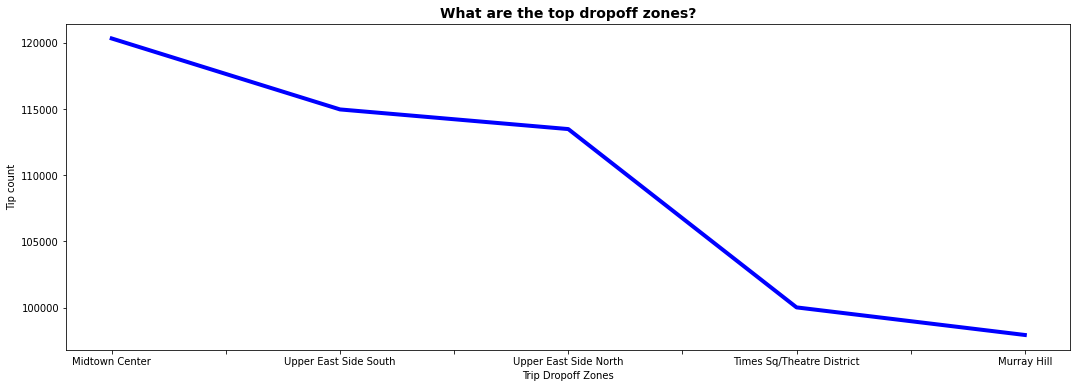

In [ ]:
# Top Dropoff zones

plt.figure(figsize=(18,6))

df['Dropoff Zone'].value_counts().head().plot(color='blue', linewidth=4)
plt.title("What are the top dropoff zones?", fontweight="bold", fontsize=14)
plt.xlabel('Trip Dropoff Zones')
plt.ylabel('Tip count')

In [ ]:
data = df2.copy()
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pickup Zone,Dropoff Zone,pickup_date,pickup_time,dropoff_date,dropoff_time
0,1,2022-08-01 00:17:39,2022-08-01 00:19:58,1.0,0.4,1.0,N,114,148,1,...,0.3,9.10,2.5,0.0,Greenwich Village South,Lower East Side,2022-08-01,00:17:39,2022-08-01,00:19:58
1,1,2022-08-01 00:26:06,2022-08-01 00:31:55,1.0,1.4,1.0,N,79,137,1,...,0.3,12.35,2.5,0.0,East Village,Kips Bay,2022-08-01,00:26:06,2022-08-01,00:31:55
2,1,2022-08-01 00:45:49,2022-08-01 00:59:29,1.0,5.2,1.0,N,79,74,1,...,0.3,23.75,2.5,0.0,East Village,East Harlem North,2022-08-01,00:45:49,2022-08-01,00:59:29
3,1,2022-08-01 00:05:49,2022-08-01 00:25:42,1.0,9.4,1.0,N,138,113,1,...,0.3,46.00,2.5,0.0,LaGuardia Airport,Greenwich Village North,2022-08-01,00:05:49,2022-08-01,00:25:42
4,1,2022-08-01 00:36:29,2022-08-01 00:51:29,1.0,1.7,1.0,N,137,68,1,...,0.3,15.80,2.5,0.0,Kips Bay,East Chelsea,2022-08-01,00:36:29,2022-08-01,00:51:29


In [ ]:
# Creating a column to calculate the tip percent

data["tip_percent"] = data["tip_amount"] * 100 / (data["tip_amount"] + data["fare_amount"])

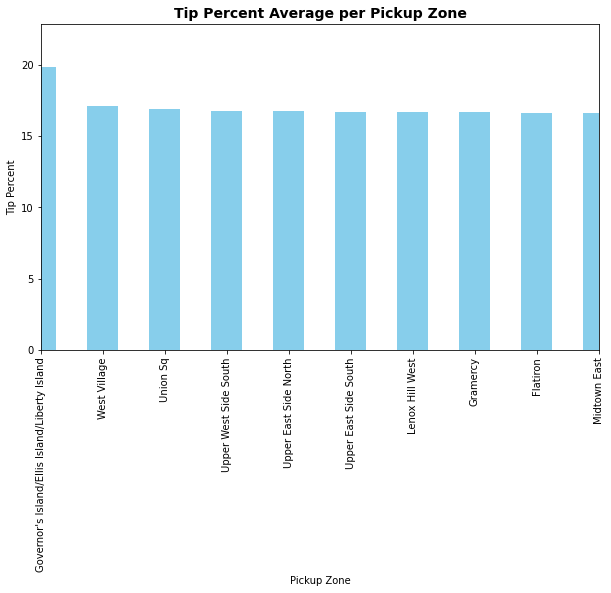

In [ ]:
# Average tip percent for the top 10 pickup locations

plt.ticklabel_format(style='plain')    
n_by_pickup_percent = data.groupby("Pickup Zone")["tip_percent"].mean().sort_values(ascending = False).plot.bar(figsize=(10,6), color = 'skyblue')
plt.title('Tip Percent Average per Pickup Zone', fontweight="bold", fontsize=14)
plt.xlabel('Pickup Zone')
plt.ylabel('Tip Percent')
plt.xlim((1,10))
plt.show()

From the graph, we can see that Pick up location 'Governor's Island/Ellis Island/Liberty island' is the one where tips are the highest, with average tip percentages being almost 20%. The next 9 locations with the highest tip percentages are almost 2.5% lower - implying that rides from 'Governor's Island/Ellis Island/Liberty island' would pay significantly higher tips, compared to other locations.

In [ ]:
# Creating columns for day, weekday, hour and month for pickup and dropoff

data['pickup_day']=data['tpep_pickup_datetime'].dt.day_name()
data['dropoff_day']=data['tpep_dropoff_datetime'].dt.day_name()
data['pickup_weekday']=data['tpep_pickup_datetime'].dt.weekday
data['dropoff_weekday']=data['tpep_dropoff_datetime'].dt.weekday
data['pickup_hour']=data['tpep_pickup_datetime'].dt.hour
data['dropoff_hour']=data['tpep_dropoff_datetime'].dt.hour
data['pickup_month']=data['tpep_pickup_datetime'].dt.month
data['dropoff_month']=data['tpep_dropoff_datetime'].dt.month

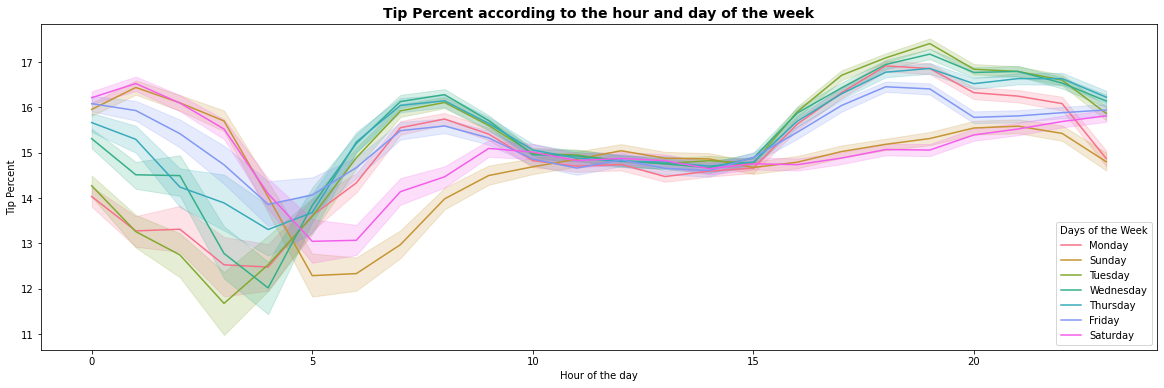

In [ ]:
# Tip percent vs Hour, Day

plt.figure(figsize=(20,6))
sns.lineplot(data=data, x="pickup_hour", y="tip_percent", hue="pickup_day", palette='husl')

plt.title("Tip Percent according to the hour and day of the week", fontweight="bold", fontsize=14)
plt.xlabel('Hour of the day')
plt.ylabel('Tip Percent')
plt.legend(title = "Days of the Week")
plt.show()

The graph confirms what we found - the tip percentages go up around the 7 PM mark. Additionally, we can also see that tip percentages are the highest for Tuesdays and Wednesdays, around 7 PM, while they are low for the weekend around the same time. In contrast, tip percentages are high for the weekend around 12 AM, and low for Tuesdays and Wednesdays for the same time.

In [ ]:
# Fixing passenger count

data['passenger_count'] = data['passenger_count'].fillna(0).astype(int)
data.drop(data[data['passenger_count'] == 0].index, inplace = True)
data.drop(data[data['passenger_count'] == 7].index, inplace = True)
data.drop(data[data['passenger_count'] == 8].index, inplace = True)
data.drop(data[data['passenger_count'] == 9].index, inplace = True)
data.passenger_count.unique()

array([1, 2, 5, 3, 4, 6])

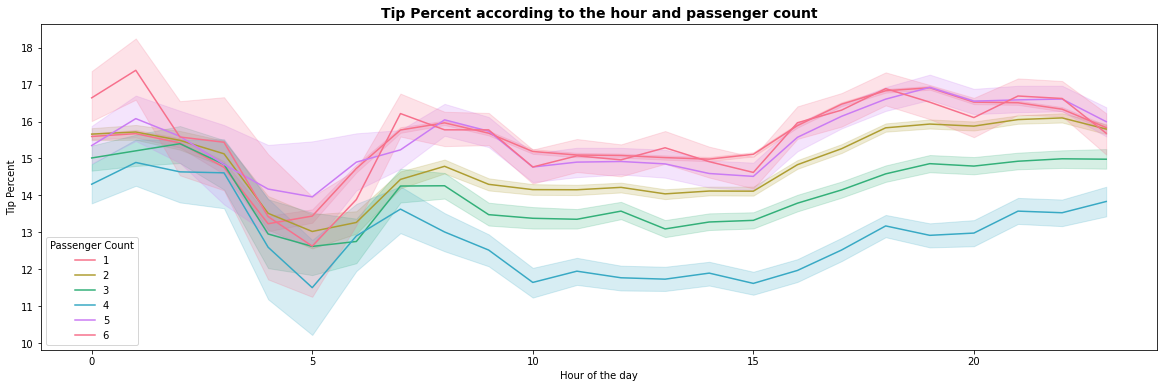

In [ ]:
# Tip percent vs Hour, Passenger count
plt.figure(figsize=(20,6))
sns.lineplot(data=data, x="pickup_hour", y="tip_percent", hue="passenger_count", palette='husl')

plt.title("Tip Percent according to the hour and passenger count", fontweight="bold", fontsize=14)
plt.xlabel('Hour of the day')
plt.ylabel('Tip Percent')
plt.legend(title = "Passenger Count")

plt.show()

Typically, more passengers tend to tip a higher percent as well. As a driver, one should be inclined to pick up rides with a higher number of passengers, as the driver could then expect a higher tipping percentage.

# Other Fares

In [ ]:
# Other fares acc to day of the Week

criteria_rb = widgets.RadioButtons(
    options=['extra', 'mta_tax', 'tolls_amount', 'airport_fee','improvement_surcharge'],
    description='Other fares:',
    disabled=False)


def plot_extra(criteria):
    plt.figure(figsize=(12, 6))
    sns.barplot(x= 'pickup_day', y=criteria, data=data, palette="husl")
    plt.title("Other fares that are charged across the week", fontweight="bold", fontsize=14)
    plt.xlabel("Week")
    plt.ylabel("Charges - dollars")
    plt.show()

widgets.interact(plot_extra, criteria = criteria_rb)

interactive(children=(RadioButtons(description='Other fares:', options=('extra', 'mta_tax', 'tolls_amount', 'a…

<function __main__.plot_extra(criteria)>

There are some extra charges on top of the fare amount, such as - mta tax, tolls amount, airport fee etc. Visualizing - which of these extra fees are charged more or less given a particular day of the week.

In [ ]:
data['pickup_date'] = data['pickup_date'].dt.date

In [ ]:
data_group = data.groupby('pickup_date').count()

In [ ]:
data_group = data_group.reset_index()

In [ ]:
# Grouping by pickup date and location and getting the sum of all the values relating to the fare

df_group_date = data[['fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount','pickup_date','Pickup Zone']].groupby(['pickup_date', 'Pickup Zone']).sum()

In [ ]:
# Resetting the index to get values of the sum for each location and date

df_group_date.reset_index(level=[0,1], inplace=True)

Next I created a dates and locations variable which had a list of all the unique pickup dates and pickup locations respectively

In [ ]:
dates = list(data['pickup_date'].unique())

In [ ]:
locations = list(data['Pickup Zone'].unique())

Here we created an interactive function that allows the user to pick the date and location to view the total amount of money earned from pickups in the chosen area at the chosen date. There is also a breakdown of the total cost into its many components

In [ ]:
@widgets.interact(pickup_date=dates, Zone = locations)
def date_location_select(pickup_date = 'pickup_date', Zone ='Pickup Zone'):
    z = df_group_date[(df_group_date['pickup_date']==pickup_date) & (df_group_date['Pickup Zone'] == Zone)]
    z = z.drop(['pickup_date', 'Pickup Zone'], axis=1)
    if z.empty:
        return False
    ax = z.T.plot(kind="bar", rot=0, figsize=(10,6))
    ax.set_xticklabels(list(z.columns), rotation = 90)
    ax.set_title("Breakdown of total amount paid by day and location",fontweight="bold", fontsize=14)
    ax.set_xlabel("Fare breakdown")
    ax.set_ylabel("Total cost for location")
    ax.get_legend().remove()

interactive(children=(Dropdown(description='pickup_date', options=(datetime.date(2022, 8, 1), datetime.date(20…

# The End